**DL_1**

In [2]:
from sklearn import preprocessing
from tensorflow.keras.datasets import boston_housing


In [3]:
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [4]:
df = boston_housing.load_data()
df

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [6]:
train_x = preprocessing.normalize(train_x)
test_x=preprocessing.normalize(test_x)

In [9]:
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [16]:
def house():
  model = Sequential()
  model.add(Dense(128,activation='relu',input_shape=(train_x[0].shape)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='relu'))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [19]:
import numpy as np
k=4
num_val_samples=len(train_x)
num_epochs=10
all_scores=[]

In [20]:
model= house()
history=model.fit(x=train_x,y=train_y,epochs=num_epochs,batch_size=1,verbose=1,validation_data=(test_x,test_y))

Epoch 1/10
404/404 [==============================] - 2s 2ms/step - loss: 142.6073 - mae: 8.8254 - val_loss: 71.5851 - val_mae: 5.9846
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 66.5546 - mae: 5.6971 - val_loss: 66.1822 - val_mae: 5.7892
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 61.7535 - mae: 5.6031 - val_loss: 60.1333 - val_mae: 5.5666
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 58.3210 - mae: 5.3623 - val_loss: 57.7654 - val_mae: 5.4534
Epoch 5/10
404/404 [==============================] - 1s 3ms/step - loss: 57.2783 - mae: 5.1924 - val_loss: 52.9219 - val_mae: 5.4951
Epoch 6/10
404/404 [==============================] - 1s 3ms/step - loss: 55.2734 - mae: 5.0908 - val_loss: 57.1578 - val_mae: 5.8688
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 51.6999 - mae: 4.8634 - val_loss: 50.6949 - val_mae: 5.3573
Epoch 8/10
404/404 [==============================] - 1s 2ms/

In [21]:
mse, mae = model.evaluate(test_x, test_y)
print('Mean squared error on test data: ', mse)
print('Mean absolute error on test data: ', mae)

4/4 [==============================] - 0s 4ms/step - loss: 49.4105 - mae: 4.8980
Mean squared error on test data:  49.41048049926758
Mean absolute error on test data:  4.897981643676758


**DL_2**

In [22]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
train_data.shape

17464789/17464789 [==============================] - 1s 0us/step


(25000,)

In [23]:
train_labels[0]

1

In [24]:
word_index=imdb.get_word_index()
reverse_word_index=dict([value,key] for (key,value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [25]:
import numpy as np
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [26]:
#perform one_hot vector encoding
def vectorize(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [27]:
x_train=vectorize(train_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
#building the network
from keras import models
from keras import layers

model = models.Sequential()

In [30]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [31]:
#compilation step
#from keras import util.custom_object_scope
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
#validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [33]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5527 - accuracy: 0.7675 - val_loss: 0.4564 - val_accuracy: 0.8073
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3455 - accuracy: 0.8901 - val_loss: 0.3311 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2541 - accuracy: 0.9179 - val_loss: 0.2939 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2062 - accuracy: 0.9326 - val_loss: 0.2774 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1697 - accuracy: 0.9452 - val_loss: 0.2794 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1449 - accuracy: 0.9549 - val_loss: 0.2828 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1216 - accuracy: 0.9639 - val_loss: 0.2949 - val_accuracy: 0.8838
Epoch 8/20
30

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

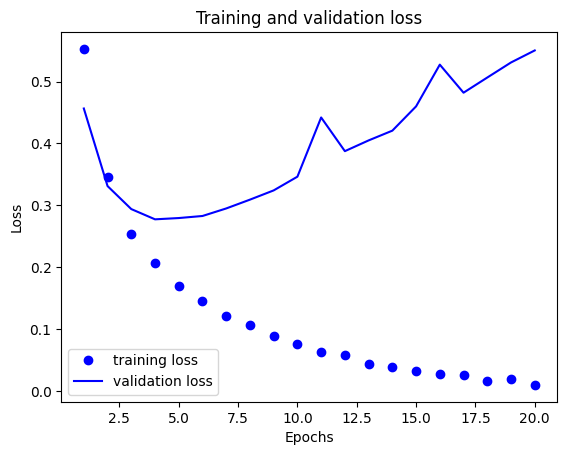

In [37]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

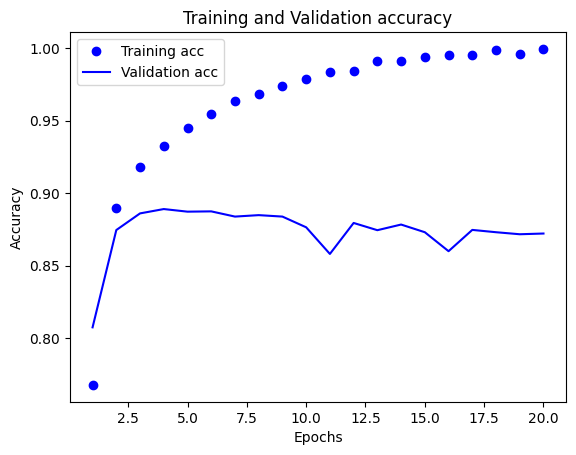

In [38]:
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
import numpy as np
#result = model.predict(test_data)
print(np.mean(history_dict['accuracy']))
#print(history_dict)

0.961106675863266


**DL_3**

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [52]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

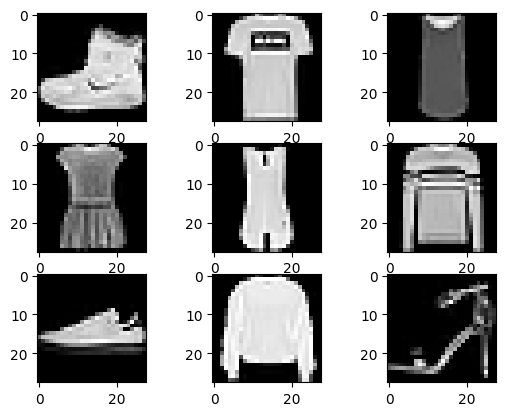

In [53]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [54]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [55]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 67s 35ms/step - loss: 0.3955 - accuracy: 0.8558 - val_loss: 0.3468 - val_accuracy: 0.8722


In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.3468 - accuracy: 0.8722
Test accuracy: 0.8722000122070312
Test loss: 0.34680795669555664


In [64]:
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[1])))

313/313 [==============================] - 6s 19ms/step
2


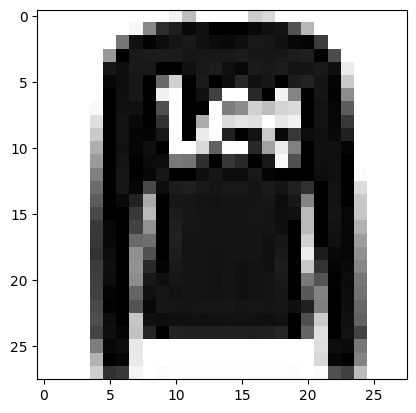

In [65]:
plt.imshow(x_test[1].reshape(28,28), cmap = plt.cm.binary)
plt.show()